In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      271116 non-null  int64  
 1   name    271116 non-null  object 
 2   sex     271116 non-null  object 
 3   age     261642 non-null  float64
 4   height  210945 non-null  float64
 5   weight  208241 non-null  float64
 6   team    271116 non-null  object 
 7   noc     271116 non-null  object 
 8   games   271116 non-null  object 
 9   year    271116 non-null  int64  
 10  season  271116 non-null  object 
 11  city    271116 non-null  object 
 12  sport   271116 non-null  object 
 13  event   271116 non-null  object 
 14  medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


<ipython-input-3-727f309cd55c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sex', palette='pastel')


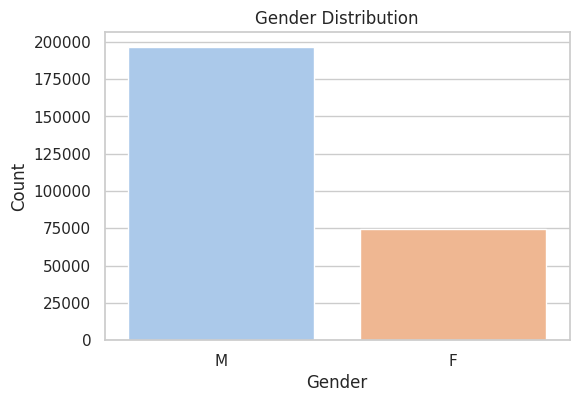

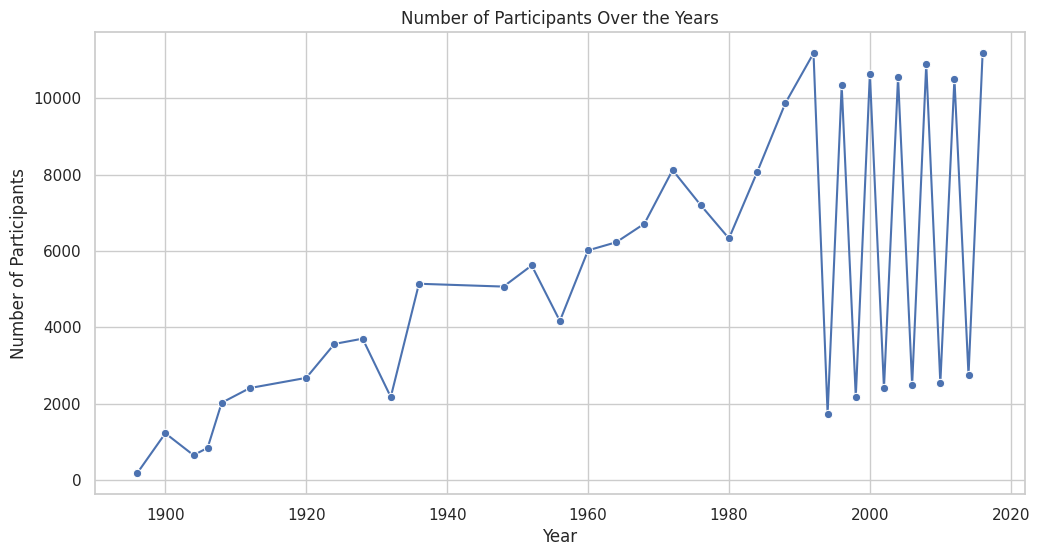

<ipython-input-3-727f309cd55c>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sports_participation.values, y=sports_participation.index, palette='coolwarm')


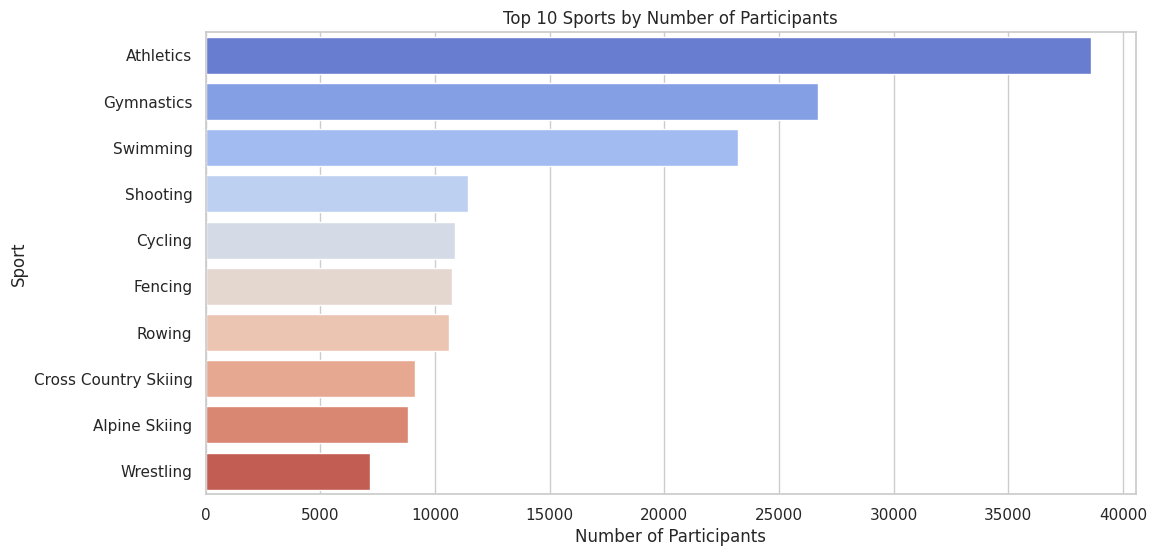

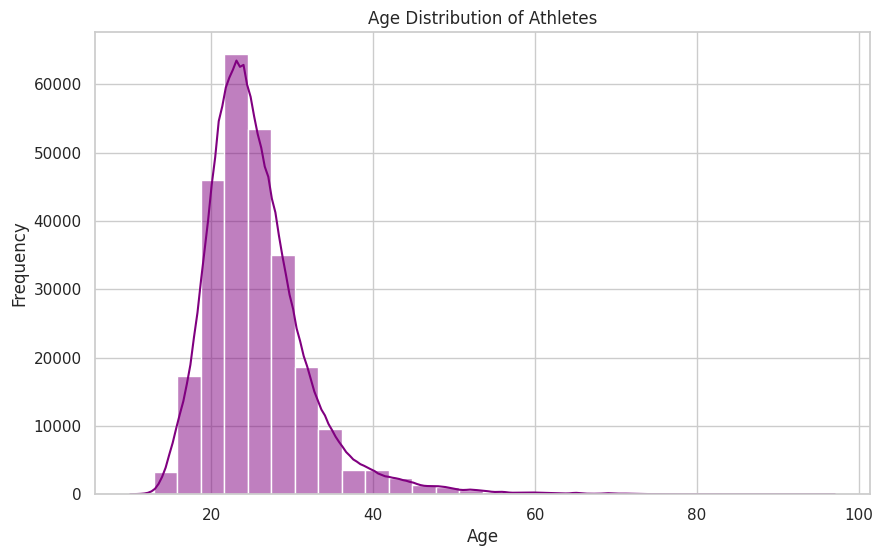

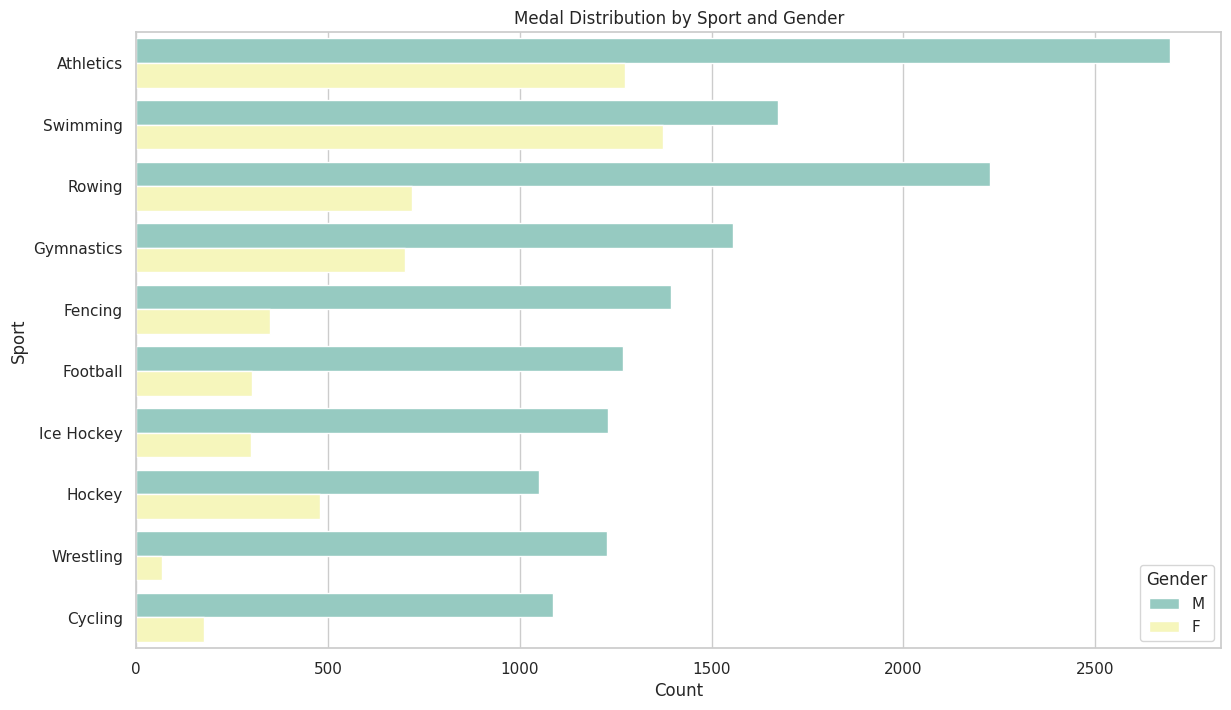

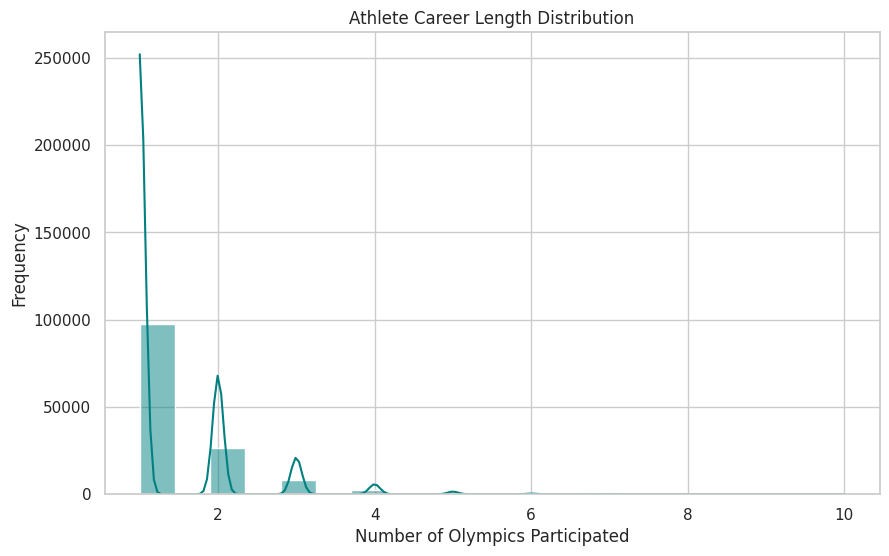

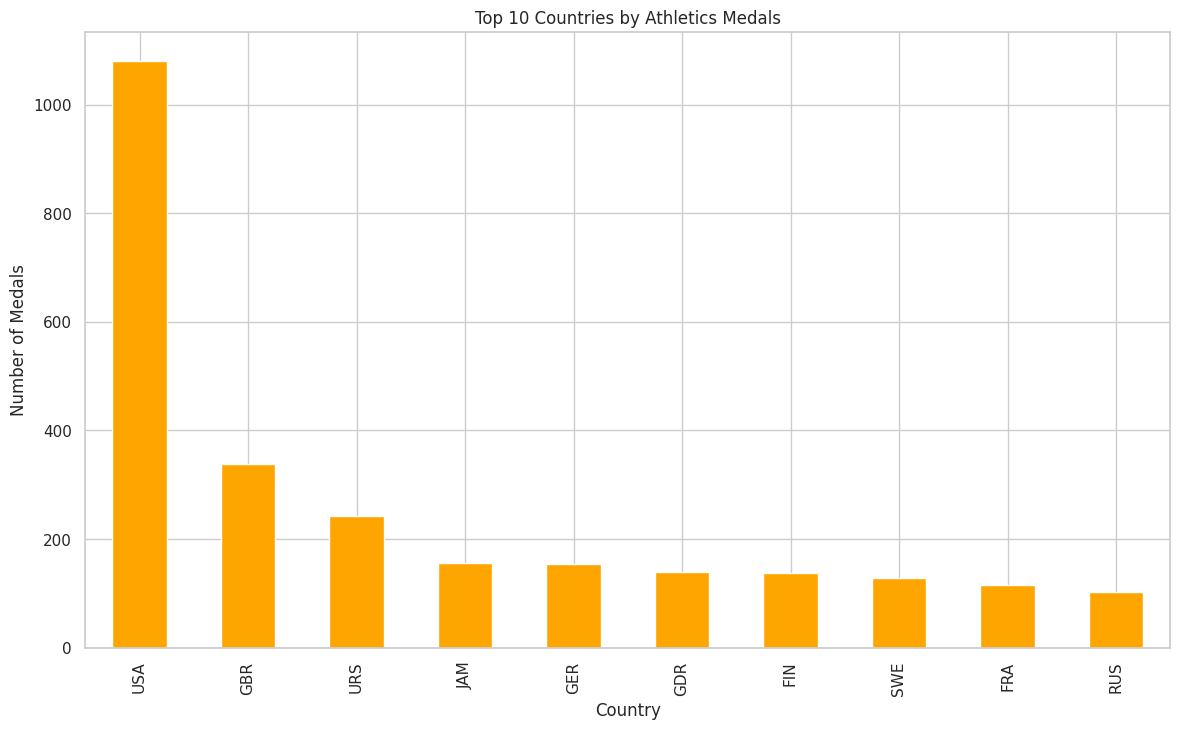

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
file_path = '/content/drive/MyDrive/olympics.csv'
data = pd.read_csv(file_path)
data.head(), data.info()
sns.set(style="whitegrid")

# 1. Analyze gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='sex', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
# 2. Trends in the number of participants by year
plt.figure(figsize=(12, 6))
participation = data.groupby('year')['id'].nunique().reset_index()
sns.lineplot(data=participation, x='year', y='id', marker='o', color='b')
plt.title('Number of Participants Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.show()
# 3. Number of participants in different sports
plt.figure(figsize=(12, 6))
sports_participation = data['sport'].value_counts().head(10)
sns.barplot(x=sports_participation.values, y=sports_participation.index, palette='coolwarm')
plt.title('Top 10 Sports by Number of Participants')
plt.xlabel('Number of Participants')
plt.ylabel('Sport')
plt.show()
# 4. Age distribution of athletes
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', kde=True, bins=30, color='purple')
plt.title('Age Distribution of Athletes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
# 5. Medal distribution by sport and gender
plt.figure(figsize=(14, 8))
medals = data[data['medal'].notnull()]
sns.countplot(data=medals, y='sport', hue='sex', palette='Set3', order=medals['sport'].value_counts().index[:10])
plt.title('Medal Distribution by Sport and Gender')
plt.xlabel('Count')
plt.ylabel('Sport')
plt.legend(title='Gender')
plt.show()

# 6. Athlete's career life
plt.figure(figsize=(10, 6))
career_length = data.groupby('name')['year'].nunique()
sns.histplot(career_length, bins=20, kde=True, color='teal')
plt.title('Athlete Career Length Distribution')
plt.xlabel('Number of Olympics Participated')
plt.ylabel('Frequency')
plt.show()
# 7. Medal distribution of different countries (taking track and field events as an example)
plt.figure(figsize=(14, 8))
athletics_medals = medals[medals['sport'] == 'Athletics']['noc'].value_counts().head(10)
athletics_medals.plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Athletics Medals')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.show()